# Predicting STEAM User Engagement

## Model Development: Linear Regression, Random Forest Regressor and Gradient Boost Regressor

In [328]:
# Imports
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [249]:
df = pd.read_csv('model_6.csv')  # load data set

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10247 entries, 0 to 10246
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   appid                          10247 non-null  int64  
 1   release_date                   10247 non-null  object 
 2   positive                       10247 non-null  int64  
 3   negative                       10247 non-null  int64  
 4   owners                         10247 non-null  int64  
 5   average_forever                10247 non-null  int64  
 6   price                          10247 non-null  float64
 7   genre                          10247 non-null  object 
 8   total_ratings                  10247 non-null  int64  
 9   genres_Action                  10247 non-null  int64  
 10  genres_Adventure               10247 non-null  int64  
 11  genres_Casual                  10247 non-null  int64  
 12  genres_Indie                   10247 non-null 

In [251]:
df = df.dropna()

In [253]:
df2.drop(columns=['genre'],inplace=True)

In [255]:
df2['log_playtime'] = np.log(df2['average_forever']) 

In [256]:
df2.head()

,appid,positive,negative,owners,average_forever,price,genres_Action,genres_Adventure,genres_Casual,genres_Indie,genres_Other,genres_RPG,catagories_fixed_Multi,catagories_fixed_Single,catagories_fixed_Single/Multi,log_playtime
0,20,4691,815,2000000,92,499.0,1,0,0,0,0,0,1,0,0,4.521789
1,30,4564,500,5000000,299,499.0,1,0,0,0,0,0,1,0,0,5.700444
2,40,1668,360,100000,23,499.0,1,0,0,0,0,0,1,0,0,3.135494
3,50,10197,535,5000000,218,499.0,1,0,0,0,0,0,0,0,1,5.384495
4,60,3395,790,5000000,23,499.0,1,0,0,0,0,0,1,0,0,3.135494


In [257]:
# Create the target variable and One-Hot encode the catagorical features
X = df2.drop(columns = ['average_forever', 'log_playtime'])
features=list(X.columns)
y = df2['log_playtime']

In [343]:
X.shape

(10247, 14)

In [258]:
# Split the data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Baseline MSE and RMSE

In [368]:
# MSE
baseline = mean_squared_error(y_test, [y_train.mean()]*len(y_test), squared=False)
baseline

1.7530199144850889

In [369]:
# RMSE
rmse = np.sqrt(baseline)
rmse

1.3240165839161868

## Standard Scaler

In [260]:
# Scale the data based on only the training data. Then scale the testing set in the same wway.
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

## Linear Regression

In [261]:
lr = LinearRegression()  # create object for the class
lr.fit(Z_train, y_train)  # perform linear regression
y_pred = lr.predict(Z_test)  # make predictions

In [262]:
X_pred = lr.predict(Z_train)
y_pred = lr.predict(Z_test)

In [352]:
lr.score(Z_train, y_train)

0.16300879949056757

In [359]:
# MSE 
print(f'Training MSE: {mean_squared_error(y_true=y_train, y_pred=X_pred)}')
print(f'Testing MSE: {mean_squared_error(y_true=y_test, y_pred=y_pred)}')

Training MSE: 2.481739747347883
Testing MSE: 3.3123857445327523


In [364]:
# MSE for training
lx_mse = mean_squared_error(y_true=y_train, y_pred=lr.predict(Z_train))
ly_mse = mean_squared_error(y_test, y_pred)

In [365]:
# RMSE
print(f'Training MSE: { np.sqrt(lx_mse)}')
print(f'Testing MSE: { np.sqrt(ly_mse)}')

Training MSE: 1.5753538482981793
Testing MSE: 1.8199960836586304


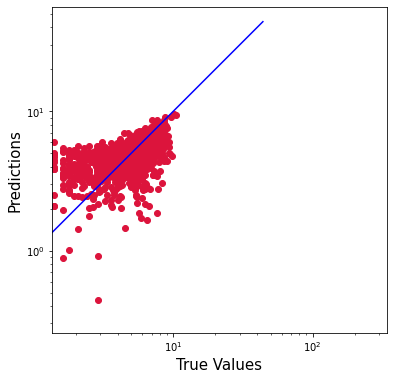

In [366]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [374]:
pd.DataFrame(lr.coef_, index= features, columns=['Coefficient'])# Turn it into a data frame

,Coefficient
appid,-0.104183
positive,0.152856
negative,-0.094536
owners,0.246838
price,0.545996
genres_Action,-0.018468
genres_Adventure,-0.012801
genres_Casual,-0.012412
genres_Indie,0.052866
genres_Other,-0.039399


## Gradient Boost Regressor

In [331]:
params = {'n_estimators':3, 'max_depth': 3, 'criterion':'mse'}
gb = GradientBoostingRegressor(**params)
gb.fit(Z_train, y_train)

GradientBoostingRegressor(criterion='mse', n_estimators=3)

In [332]:
gb_pred = gb.predict(Z_train)
bg_pred = gb.predict(Z_test)

In [344]:
gb.score(Z_test, y_test)

0.125103667545454

In [360]:
# MSE 
print(f'Training MSE: {mean_squared_error(y_true=y_train, y_pred=gb_pred)}')
print(f'Testing MSE: {mean_squared_error(y_true=y_test, y_pred=bg_pred)}')

Training MSE: 2.5730208636610628
Testing MSE: 2.68622040740402


In [358]:
# MSE for training
x_mse = mean_squared_error(y_true=y_train, y_pred=gb.predict(Z_train))
y_mse = mean_squared_error(y_test, bg_pred)

In [361]:
# RMSE
print(f'Training MSE: { np.sqrt(x_mse)}')
print(f'Testing MSE: { np.sqrt(y_mse)}')

Training MSE: 1.6040638589722862
Testing MSE: 1.6389693125266318


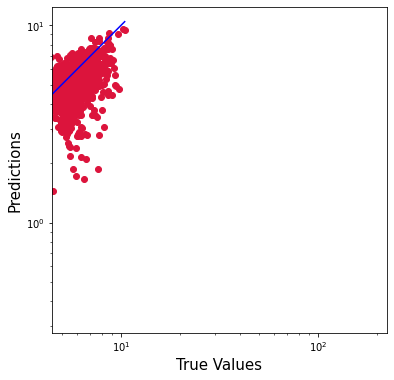

In [367]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(bg_pred), max(y_test))
p2 = min(min(bg_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Random Forest Regressor

In [276]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)

In [277]:
# Train the model on training data
rf.fit(Z_train, y_train)
rf_pred = rf.predict(Z_test)

In [278]:
rf.score(Z_test, y_test)

0.33041208760610197

In [371]:
# Check the MSE on the training and testing sets.
print(f'MSE on training set: {mean_squared_error(y_train, rf.predict(Z_train))}')
print(f'MSE on testing set: {mean_squared_error(y_test, rf_pred)}')

MSE on training set: 0.267261514664184
MSE on testing set: 2.0558558175428066


In [376]:
# MSE for training
rx_mse = mean_squared_error(y_true=y_train, y_pred=rf.predict(Z_train))
ry_mse = mean_squared_error(y_test, rf_pred)

In [377]:
# RMSE
print(f'Training MSE: { np.sqrt(rx_mse)}')
print(f'Testing MSE: { np.sqrt(ry_mse)}')

Training MSE: 0.5169734177539345
Testing MSE: 1.433825588257793


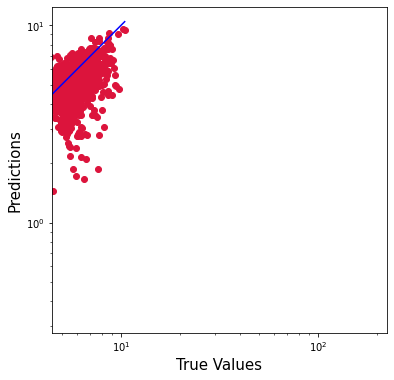

In [370]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(rf_pred), max(y_test))
p2 = min(min(rf_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [279]:
resids = y_test - rf_pred

In [280]:
np.mean(resids)

-0.006736459124799907

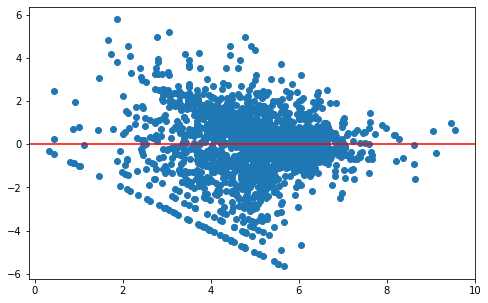

In [281]:
# Let's plot our residuals - check the L and E assumptions
plt.figure(figsize=(8,5))
plt.scatter(rf_pred, resids)
plt.axhline(0, color='red');

In [284]:
#### Fucntion to gridsearch through the models (work in progress) #####

def rfr_model(X_train, y_train):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    
    rf = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=False, verbose=False)
    scores = cross_val_score(rf, X_train, y_train, cv=10)

    return scores

In [285]:
rfr_model(X_train, y_train)

array([-0.99766005, -0.92075626, -1.00476298, -0.92814586, -1.02140179,
       -1.00596102, -1.00455497, -1.01043396, -1.03186364, -0.94759334])

## Model Evaluation

The best performing model I believe is Gradient Boost. Even though it did not have as high of an accuracy score as Random Forest, it had 50% higher accuracy score than the base model and MSE and RMSE for training and testing is very closer. Linear Regression, base model has the lowest accuracy score and it is slightly overfit. While Random Forest had the highest accuracy score, it was very overfit. 

| Model             |   MSE train/test    | RMSE train/test   | Accuracy Score|
|-------------------|---------------------|-------------------|---------------|
| Linear Regression | 2.5/3.3             | 1.5/1.8           | 0.07          | 
| Random Forest     | 0.26/2.05           | 0.5/1.4           | 0.33          | 
| Gradient Boost    | 2.5/2.6             | 1.6/1.7           | 0.14          | 